Problema de negócio:
É possível prever o salário de alguém com base no número de horas de estudo por mês?

In [9]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.express as px

### Carregando os dados

In [4]:
# carregando os dados
df = pd.read_csv('dataset.csv')

### Preparação dos dados

In [15]:
X = np.array(df['horas_estudo_mes'])
X = X.reshape(-1, 1)  # transforma em uma matriz de X (-1 diz para o numpy calcular o numero de linhas necessárias) por 1 coluna

# O X é a constante, queremos prever o y a partir do X

In [14]:
y = df['salario']

In [16]:
# gráfico com plotly
fig = px.scatter(df, x='horas_estudo_mes', y='salario', title="Salário e Horas de Estudo")
fig.show()

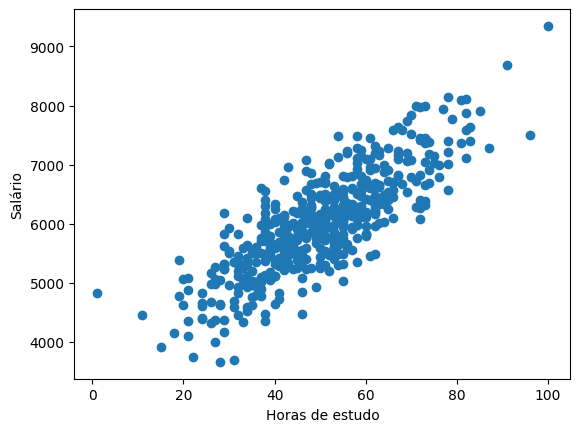

In [7]:
# gráfico
plt.scatter(X, y)
plt.xlabel("Horas de estudo")
plt.ylabel("Salário")
plt.show()

In [ ]:
# treinamento e teste dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% aleatório dos dados vai para teste
x_treino.shape

### Montagem do modelo

In [7]:
# criação do modelo de regressão linear simples
model = LinearRegression()

In [ ]:
# treinamento do modelo
model.fit(x_treino, y_treino)

In [ ]:
# visualização da reta de regressão linear
plt.scatter(X, y)
plt.plot(X, model.predict(X), color="red", label="Previsão do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [ ]:
# avaliação do modelo -> em R²
score = model.score(x_teste, y_teste)
score

In [ ]:
# o modelo cria operações matemáticas que geram duas variáveis para realizar a função para descobrir a variável alvo
model.intercept_  # Intercepto - W0
model.coef_  # Slope - W1

### Deploy (aplicação do modelo)

In [ ]:
n = int(input("Quantas horas por mês você estuda: "))
horas_estudos2 = np.array([[n]])

salario_previsto = model.predict(horas_estudos2)  # previsão do valor (apenas aplica a fórmula após descobrir W0 e W1)

print(f"Seu salário será cerca de R${salario_previsto[0]}")

### Teste com StatsModels

In [ ]:
import statsmodels.api as sm

X2 = df['horas_estudo_mes']
X2 = sm.add_constant(X2)

y2 = df['salario']

model = sm.OLS(y2, X2)
result = model.fit()
print(result.summary())